<font color="green">**Linear Regression model for stock prediction using stock data and News Vectors**</font>

**Import Libraries**

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd

#Data Scaling Libraries
from sklearn.preprocessing import MinMaxScaler

#Error Metrics Libraries
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Linear Regression Library
from sklearn.linear_model import LinearRegression

##SAE Libraries
from keras.layers import Input, Dense
from keras.models import Model

#Data Visualization Library
plt.style.use('fivethirtyeight')

In [2]:
# this is the size of our encoded representations
encoding_dim = 50  # 50 floats

# this is our input placeholder
input_img = Input(shape=(300,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(300, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
#configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

**Read Data**

In [6]:
newsVectors = pd.read_csv('vectorAMD.csv')
newsVectors.head(1)

,date,news,vectors,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,...,vec260,vec261,vec262,vec263,vec264,vec265,vec266,vec267,vec268,vec269,vec270,vec271,vec272,vec273,vec274,vec275,vec276,vec277,vec278,vec279,vec280,vec281,vec282,vec283,vec284,vec285,vec286,vec287,vec288,vec289,vec290,vec291,vec292,vec293,vec294,vec295,vec296,vec297,vec298,vec299
0,2020-05-26,BLICKNovartisAugenarznei Beovu kommt künftig a...,[ 5.07812500e-02 -3.95329781e-02 1.02132158e-...,0.050781,-0.039533,0.010213,-0.075195,-0.038859,0.104736,0.194661,-0.18689,-0.004395,0.226562,-0.172363,-0.138631,-0.053874,-0.110758,-0.088399,-0.058268,0.079976,0.237467,-0.072428,0.016398,-0.08724,0.154297,0.150391,0.095378,-0.157715,-0.1132,-0.075765,0.18457,-0.131673,-0.199056,0.144531,-0.018026,-0.070312,-0.266602,-0.110677,-0.177897,-0.033723,...,0.059896,0.205729,0.191081,-0.02596,-0.053304,0.165365,0.037242,-0.040446,-0.010254,0.027181,0.030843,-0.072266,-0.121501,0.011556,0.185465,0.033366,-0.189453,0.184408,-0.291016,0.193522,-0.128255,0.064046,0.050374,0.033203,-0.097377,0.129021,0.144938,-0.028564,-0.152262,0.011149,-0.065104,-0.025411,-0.240885,0.204753,-0.058431,-0.01237,-0.157552,0.032389,0.049072,0.152181


In [7]:
vectors = newsVectors.iloc[:,3:]

In [8]:
vectors.head(2)

,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,vec38,vec39,...,vec260,vec261,vec262,vec263,vec264,vec265,vec266,vec267,vec268,vec269,vec270,vec271,vec272,vec273,vec274,vec275,vec276,vec277,vec278,vec279,vec280,vec281,vec282,vec283,vec284,vec285,vec286,vec287,vec288,vec289,vec290,vec291,vec292,vec293,vec294,vec295,vec296,vec297,vec298,vec299
0,0.050781,-0.039533,0.010213,-0.075195,-0.038859,0.104736,0.194661,-0.186890,-0.004395,0.226562,-0.172363,-0.138631,-0.053874,-0.110758,-0.088399,-0.058268,0.079976,0.237467,-0.072428,0.016398,-0.08724,0.154297,0.150391,0.095378,-0.157715,-0.113200,-0.075765,0.18457,-0.131673,-0.199056,0.144531,-0.018026,-0.070312,-0.266602,-0.110677,-0.177897,-0.033723,0.250651,0.053874,0.031413,...,0.059896,0.205729,0.191081,-0.025960,-0.053304,0.165365,0.037242,-0.040446,-0.010254,0.027181,0.030843,-0.072266,-0.121501,0.011556,0.185465,0.033366,-0.189453,0.184408,-0.291016,0.193522,-0.128255,0.064046,0.050374,0.033203,-0.097377,0.129021,0.144938,-0.028564,-0.152262,0.011149,-0.065104,-0.025411,-0.240885,0.204753,-0.058431,-0.012370,-0.157552,0.032389,0.049072,0.152181
1,-0.003174,0.051782,-0.000952,-0.041371,0.044580,-0.038391,-0.029260,-0.202637,0.105780,0.057080,0.004889,-0.091910,0.007547,0.161700,-0.099097,0.063708,0.009985,0.104175,0.017120,0.007758,0.07345,-0.041113,0.013174,-0.018564,0.076413,-0.085272,0.001062,-0.03020,-0.016718,0.037366,-0.003046,-0.101477,-0.018640,0.046960,-0.036743,-0.037891,-0.011987,-0.100262,0.041248,0.028674,...,0.106567,0.027048,0.079728,0.096387,0.063635,0.088950,-0.097095,-0.006531,-0.148611,0.047131,-0.107397,-0.072119,0.014468,-0.069873,0.025391,-0.083803,-0.066479,-0.043561,0.008105,0.067792,-0.049259,0.059497,-0.057251,-0.009552,0.018744,-0.035931,-0.017302,0.041388,-0.058539,-0.058434,-0.064038,0.020288,-0.015991,0.041321,0.051868,0.066577,-0.041785,-0.011420,0.010396,0.005371


In [9]:
#Converting the dataframe to a numpy array
vectors_nparr = vectors.values

In [10]:
autoencoder.fit(vectors_nparr, vectors_nparr,
                epochs=200,
                batch_size=256,
                shuffle=True,
               )

Epoch 1/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6943
Epoch 2/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6943
Epoch 3/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6943
Epoch 4/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6943
Epoch 5/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 6/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6943
Epoch 8/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6943
Epoch 9/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6943
Epoch 10/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6943
Epoch 11/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6943
Epoch 12/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6943
Epoch 13/200
2/2 [==============================] - 0s 3ms/st

In [11]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_data = encoder.predict(vectors_nparr)
decoded_data = decoder.predict(encoded_data)

In [12]:
encoded_data

array([[0.05200097, 0.15368256, 0.        , ..., 0.        , 0.        ,
        0.5892473 ],
       [0.06840874, 0.01886892, 0.        , ..., 0.01658234, 0.        ,
        0.        ],
       [0.1759492 , 0.20284897, 0.        , ..., 0.        , 0.        ,
        0.08852983],
       ...,
       [0.        , 0.        , 0.        , ..., 0.13730037, 0.01827835,
        0.        ],
       [0.17673545, 0.        , 0.0139016 , ..., 0.        , 0.08564354,
        0.04299415],
       [0.24788988, 0.05963977, 0.        , ..., 0.        , 0.14011292,
        0.        ]], dtype=float32)

In [13]:
decoded_data

array([[0.50259143, 0.5282989 , 0.50734395, ..., 0.5411765 , 0.5290668 ,
        0.4820227 ],
       [0.5029766 , 0.5129966 , 0.5095601 , ..., 0.51146257, 0.504584  ,
        0.50905776],
       [0.4856418 , 0.518132  , 0.50341403, ..., 0.53837925, 0.5310026 ,
        0.5036068 ],
       ...,
       [0.48482212, 0.52287817, 0.50162584, ..., 0.52011293, 0.49811208,
        0.50534534],
       [0.49808076, 0.5062752 , 0.5055829 , ..., 0.52934474, 0.5151165 ,
        0.51336306],
       [0.5017973 , 0.5006457 , 0.50492144, ..., 0.5402462 , 0.5130807 ,
        0.50169116]], dtype=float32)

In [14]:
vectors_nparr

array([[ 0.05078125, -0.03953298,  0.01021322, ...,  0.03238932,
         0.04907227,  0.15218098],
       [-0.00317383,  0.05178223, -0.00095215, ..., -0.01141968,
         0.01039581,  0.00537109],
       [-0.14314778, -0.0814209 , -0.05436198, ...,  0.05853271,
         0.18823242, -0.09975179],
       ...,
       [ 0.11802979,  0.02709961, -0.01370697, ..., -0.04772949,
         0.04003906,  0.04770508],
       [-0.00675456,  0.04950969, -0.00374349, ..., -0.11477661,
        -0.04498291, -0.0061849 ],
       [-0.07162476,  0.01287406, -0.04348101, ...,  0.00108119,
        -0.08231027, -0.03890991]])

In [15]:
encoded_vec = pd.DataFrame(data=encoded_data)

In [16]:
encoded_vec = encoded_vec.add_prefix('vec')

In [17]:
encoded_vec['date'] = pd.Series(newsVectors['date'])

In [18]:
encoded_vec = encoded_vec[['date', 'vec0', 'vec1', 'vec2','vec3', 'vec4', 'vec5','vec6', 'vec7', 'vec8','vec9', 'vec10', 'vec11','vec12', 'vec13', 'vec14','vec15', 'vec16', 'vec17','vec18', 'vec19', 'vec20','vec21', 'vec22','vec23', 'vec24', 'vec25','vec26', 'vec27', 'vec28','vec29', 'vec30','vec31', 'vec32','vec33', 'vec34', 'vec35','vec36', 'vec37', 'vec38','vec39', 'vec40','vec41', 'vec42','vec43', 'vec44', 'vec45','vec46', 'vec47', 'vec48','vec49']]

In [19]:
encoded_vec.head(2)

,date,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,vec38,vec39,vec40,vec41,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49
0,2020-05-26,0.052001,0.153683,0.0,0.128517,0.219462,0.056404,0.0,0.0,0.000000,0.0,0.187123,0.08174,0.005443,0.0,0.174375,0.0,0.034479,0.025543,0.000000,0.000000,0.042566,0.000000,0.0,0.114936,0.106831,0.0,0.09729,0.056460,0.069846,0.000000,0.160981,0.112527,0.245599,0.15464,0.0,0.092499,0.136932,0.0,0.068954,0.000000,0.180717,0.130371,0.0,0.206711,0.164026,0.000000,0.026619,0.000000,0.0,0.589247
1,2020-05-19,0.068409,0.018869,0.0,0.060483,0.081989,0.066259,0.0,0.0,0.016269,0.0,0.076779,0.00000,0.085845,0.0,0.000000,0.0,0.050514,0.000000,0.030239,0.076547,0.000000,0.057414,0.0,0.023327,0.062786,0.0,0.03441,0.062987,0.000000,0.012056,0.164537,0.000000,0.000000,0.00000,0.0,0.000000,0.020745,0.0,0.000000,0.012227,0.010045,0.285520,0.0,0.000000,0.058661,0.014088,0.000000,0.016582,0.0,0.000000


In [20]:
# encoded_vec.to_csv('encoded_vec_dis.csv')

In [21]:
# encoded_vec = pd.read_csv('encoded_vec_dis.csv')

**Read Stocks**

In [22]:
#Get the stock quote 
df = web.DataReader('DIS', data_source='yahoo', start='2017-01-01', end='2020-06-08') 
df=df.reset_index()

In [23]:
df.rename(columns={"Date":"date"},inplace=True)
df.head(5)

,date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,106.900002,105.209999,105.300003,106.080002,8884300.0,101.584358
1,2017-01-04,107.500000,106.250000,106.639999,107.440002,8322000.0,102.886719
2,2017-01-05,107.620003,106.790001,107.169998,107.379997,6303000.0,102.829262
3,2017-01-06,109.349998,107.750000,108.019997,108.980003,9551300.0,104.361458
4,2017-01-09,108.830002,108.110001,108.580002,108.360001,6195200.0,103.767731


In [24]:
encoded_vec['date'] = pd.to_datetime(encoded_vec['date'])
encoded_vec['date'] = encoded_vec['date'].dt.date
grouped=encoded_vec.groupby('date').sum()
grouped=grouped.reset_index()
grouped.head(5)

,date,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,vec38,vec39,vec40,vec41,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49
0,2016-07-22,0.424625,0.05964,0.013902,0.000000,0.000000,0.369602,0.073226,0.000000,0.076508,0.205374,0.038566,0.003553,0.000000,0.259203,0.0,0.105883,0.0,0.211431,0.000000,0.108554,0.044835,0.037575,0.066972,0.148461,0.133151,0.061787,0.000000,0.123241,0.000000,0.153213,0.160910,0.093680,0.121133,0.000000,0.0,0.038302,0.119060,0.109968,0.184503,0.032775,0.280610,0.288079,0.000000,0.025107,0.291324,0.079797,0.000000,0.000000,0.225756,0.042994
1,2016-08-03,0.000000,0.00000,0.000000,0.009293,0.033113,0.005527,0.185342,0.000000,0.000000,0.000000,0.131583,0.011519,0.105900,0.017972,0.0,0.031545,0.0,0.000000,0.000000,0.080418,0.024257,0.000000,0.122953,0.015236,0.000000,0.000000,0.046847,0.144423,0.000000,0.005041,0.000000,0.031566,0.000000,0.107288,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160646,0.000000,0.046450,0.066702,0.000000,0.000000,0.137300,0.018278,0.000000
2,2016-08-25,0.030325,0.00000,0.000000,0.027867,0.000000,0.271898,0.291716,0.000000,0.007815,0.057117,0.159644,0.000000,0.299328,0.301917,0.0,0.000000,0.0,0.018282,0.000000,0.236870,0.000000,0.373473,0.000000,0.000000,0.000000,0.144752,0.000000,0.000000,0.000000,0.000000,0.043599,0.000000,0.020594,0.340873,0.0,0.048462,0.000000,0.063876,0.010474,0.081517,0.045717,0.174124,0.087752,0.019899,0.045049,0.134556,0.000000,0.184676,0.000000,0.000000
3,2016-08-31,0.091897,0.00000,0.000000,0.065897,0.000000,0.087800,0.150161,0.113957,0.029276,0.150893,0.000000,0.000000,0.027585,0.025025,0.0,0.000000,0.0,0.000000,0.000000,0.037919,0.000000,0.303488,0.056515,0.034598,0.047535,0.000000,0.000000,0.029607,0.058902,0.000000,0.161307,0.125825,0.076849,0.000000,0.0,0.000000,0.026769,0.211761,0.000000,0.103124,0.192137,0.098859,0.000000,0.000000,0.000000,0.000000,0.053567,0.002843,0.000000,0.000000
4,2016-09-06,0.000000,0.00000,0.000000,0.141610,0.000000,0.001325,0.184344,0.095824,0.011468,0.040197,0.000000,0.000000,0.074944,0.000000,0.0,0.000000,0.0,0.000000,0.030452,0.092327,0.000000,0.075475,0.040802,0.000000,0.004474,0.000000,0.000000,0.000000,0.000000,0.000000,0.119379,0.052949,0.105724,0.127030,0.0,0.000000,0.132133,0.116773,0.000000,0.007502,0.043665,0.069385,0.000000,0.000000,0.010318,0.000000,0.000000,0.000000,0.000000,0.075075


In [25]:
r = pd.date_range(start=grouped.date.min(), end=grouped.date.max())
grouped=grouped.set_index('date').reindex(r).rename_axis('date')
grouped=grouped.ffill(axis=0)
grouped.head(3)

,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,vec38,vec39,vec40,vec41,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-22,0.424625,0.05964,0.013902,0.0,0.0,0.369602,0.073226,0.0,0.076508,0.205374,0.038566,0.003553,0.0,0.259203,0.0,0.105883,0.0,0.211431,0.0,0.108554,0.044835,0.037575,0.066972,0.148461,0.133151,0.061787,0.0,0.123241,0.0,0.153213,0.16091,0.09368,0.121133,0.0,0.0,0.038302,0.11906,0.109968,0.184503,0.032775,0.28061,0.288079,0.0,0.025107,0.291324,0.079797,0.0,0.0,0.225756,0.042994
2016-07-23,0.424625,0.05964,0.013902,0.0,0.0,0.369602,0.073226,0.0,0.076508,0.205374,0.038566,0.003553,0.0,0.259203,0.0,0.105883,0.0,0.211431,0.0,0.108554,0.044835,0.037575,0.066972,0.148461,0.133151,0.061787,0.0,0.123241,0.0,0.153213,0.16091,0.09368,0.121133,0.0,0.0,0.038302,0.11906,0.109968,0.184503,0.032775,0.28061,0.288079,0.0,0.025107,0.291324,0.079797,0.0,0.0,0.225756,0.042994
2016-07-24,0.424625,0.05964,0.013902,0.0,0.0,0.369602,0.073226,0.0,0.076508,0.205374,0.038566,0.003553,0.0,0.259203,0.0,0.105883,0.0,0.211431,0.0,0.108554,0.044835,0.037575,0.066972,0.148461,0.133151,0.061787,0.0,0.123241,0.0,0.153213,0.16091,0.09368,0.121133,0.0,0.0,0.038302,0.11906,0.109968,0.184503,0.032775,0.28061,0.288079,0.0,0.025107,0.291324,0.079797,0.0,0.0,0.225756,0.042994


In [26]:
merged_data = pd.merge(left=df, right=grouped, left_on='date', right_on='date') #merge datasets
# merged_data.drop(['date'], axis=1,inplace=True) #remove redundant column
merged_data.head(3)

,date,High,Low,Open,Close,Volume,Adj Close,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,vec38,vec39,vec40,vec41,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49
0,2017-01-03,106.900002,105.209999,105.300003,106.080002,8884300.0,101.584358,0.165973,0.282412,0.0,0.0,0.031606,0.311206,0.070066,0.0,0.14291,0.109135,0.0,0.022142,0.0,0.262035,0.0,0.09418,0.0,0.320445,0.015059,0.226606,0.060312,0.321279,0.079584,0.064999,0.010012,0.038456,0.0,0.05922,0.264916,0.156593,0.042451,0.189975,0.049796,0.0,0.0,0.0,0.110496,0.100582,0.15401,0.060084,0.249537,0.403055,0.0,0.107221,0.232337,0.0,0.0,0.0,0.077735,0.0819
1,2017-01-04,107.500000,106.250000,106.639999,107.440002,8322000.0,102.886719,0.165973,0.282412,0.0,0.0,0.031606,0.311206,0.070066,0.0,0.14291,0.109135,0.0,0.022142,0.0,0.262035,0.0,0.09418,0.0,0.320445,0.015059,0.226606,0.060312,0.321279,0.079584,0.064999,0.010012,0.038456,0.0,0.05922,0.264916,0.156593,0.042451,0.189975,0.049796,0.0,0.0,0.0,0.110496,0.100582,0.15401,0.060084,0.249537,0.403055,0.0,0.107221,0.232337,0.0,0.0,0.0,0.077735,0.0819
2,2017-01-05,107.620003,106.790001,107.169998,107.379997,6303000.0,102.829262,0.165973,0.282412,0.0,0.0,0.031606,0.311206,0.070066,0.0,0.14291,0.109135,0.0,0.022142,0.0,0.262035,0.0,0.09418,0.0,0.320445,0.015059,0.226606,0.060312,0.321279,0.079584,0.064999,0.010012,0.038456,0.0,0.05922,0.264916,0.156593,0.042451,0.189975,0.049796,0.0,0.0,0.0,0.110496,0.100582,0.15401,0.060084,0.249537,0.403055,0.0,0.107221,0.232337,0.0,0.0,0.0,0.077735,0.0819


In [27]:
merged_data=merged_data.set_index('date')
merged_data.head(3)

,High,Low,Open,Close,Volume,Adj Close,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,vec38,vec39,vec40,vec41,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,106.900002,105.209999,105.300003,106.080002,8884300.0,101.584358,0.165973,0.282412,0.0,0.0,0.031606,0.311206,0.070066,0.0,0.14291,0.109135,0.0,0.022142,0.0,0.262035,0.0,0.09418,0.0,0.320445,0.015059,0.226606,0.060312,0.321279,0.079584,0.064999,0.010012,0.038456,0.0,0.05922,0.264916,0.156593,0.042451,0.189975,0.049796,0.0,0.0,0.0,0.110496,0.100582,0.15401,0.060084,0.249537,0.403055,0.0,0.107221,0.232337,0.0,0.0,0.0,0.077735,0.0819
2017-01-04,107.500000,106.250000,106.639999,107.440002,8322000.0,102.886719,0.165973,0.282412,0.0,0.0,0.031606,0.311206,0.070066,0.0,0.14291,0.109135,0.0,0.022142,0.0,0.262035,0.0,0.09418,0.0,0.320445,0.015059,0.226606,0.060312,0.321279,0.079584,0.064999,0.010012,0.038456,0.0,0.05922,0.264916,0.156593,0.042451,0.189975,0.049796,0.0,0.0,0.0,0.110496,0.100582,0.15401,0.060084,0.249537,0.403055,0.0,0.107221,0.232337,0.0,0.0,0.0,0.077735,0.0819
2017-01-05,107.620003,106.790001,107.169998,107.379997,6303000.0,102.829262,0.165973,0.282412,0.0,0.0,0.031606,0.311206,0.070066,0.0,0.14291,0.109135,0.0,0.022142,0.0,0.262035,0.0,0.09418,0.0,0.320445,0.015059,0.226606,0.060312,0.321279,0.079584,0.064999,0.010012,0.038456,0.0,0.05922,0.264916,0.156593,0.042451,0.189975,0.049796,0.0,0.0,0.0,0.110496,0.100582,0.15401,0.060084,0.249537,0.403055,0.0,0.107221,0.232337,0.0,0.0,0.0,0.077735,0.0819


In [28]:
data = merged_data.filter(['Close','vec0','vec1','vec3', 'vec4', 'vec5','vec6', 'vec7', 'vec8','vec9', 'vec10', 'vec11','vec12', 'vec13', 'vec14','vec15', 'vec16', 'vec17','vec18', 'vec19', 'vec20','vec21', 'vec22','vec23', 'vec24', 'vec25','vec26', 'vec27', 'vec28','vec29', 'vec30','vec31', 'vec32','vec33', 'vec34', 'vec35','vec36', 'vec37', 'vec38','vec39', 'vec40','vec41', 'vec42','vec43', 'vec44', 'vec45','vec46', 'vec47', 'vec48','vec49'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [29]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [30]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,:])
  y_train.append(dataset[i,0])

In [31]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test =  df['Close'][training_data_len :]
# y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,:])

In [33]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

**Linear Regression: Build model and train using the training datat**

In [34]:
#implement linear regression

model = LinearRegression()

In [35]:
nsamples, nx, ny = x_train.shape
d2_x_train = x_train.reshape((nsamples,nx*ny))

In [36]:
model.fit(d2_x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
x_test.shape

(170, 60, 50)

In [38]:
nsamples_test, nx_test, ny_test = x_test.shape
d2_test = x_test.reshape((nsamples_test,nx_test*ny_test))

In [39]:
preds = model.predict(d2_test)
preds = preds.reshape(-1,1)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

22.731842457368423

In [40]:
#Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = preds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


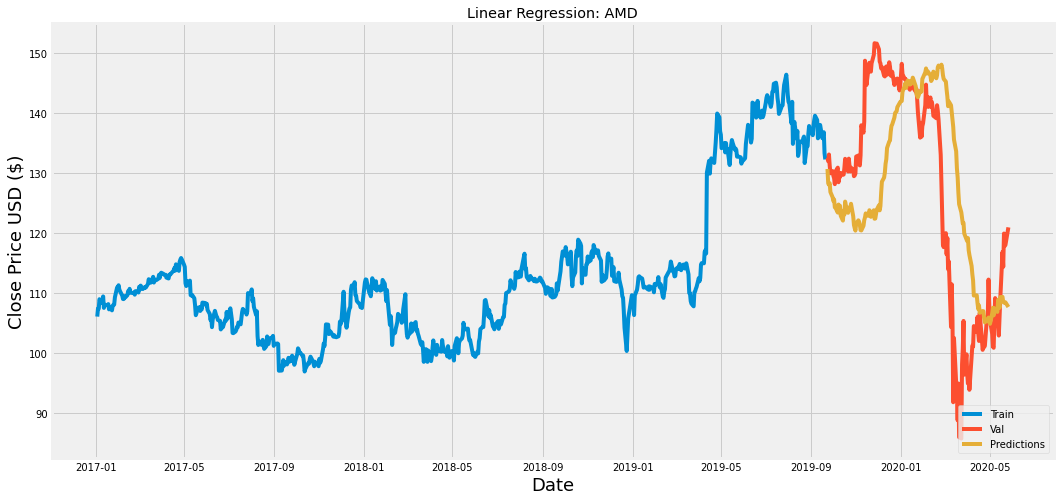

In [41]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Linear Regression: AMD')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()